<a href="https://colab.research.google.com/github/rulogar1234/nuclio-1/blob/develop/1er_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [521]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [522]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px
from itertools import combinations

In [523]:
#leemos el fichero de renfe
df_bmw1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1stEntregable/bmw_pricing_v3.csv",sep=",")
df_bmw1.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# **FECHAS**

In [524]:
#convertimos las fechas
for i in ["fecha_registro","fecha_venta"]:
    df_bmw1[i]=pd.to_datetime(df_bmw1[i])

# **DUPLICADOS**

In [525]:
#verificamos duplicados
df_bmw1[df_bmw1.duplicated(keep='first')]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


# **NEGATIVOS**

In [526]:
#miramos que no hayan precios negativos o 0
df_bmw1[(df_bmw1['precio'] < 0)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [527]:
df_bmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [528]:
#miramos los valores que tenemos en la marca
df_bmw1['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [529]:
#como la lista es de BMW, todos los coches suponemos que son BMW, borramos la columna
del df_bmw1['marca']

In [530]:
#miramos cuantos registros tiene nuestro dataset
len(df_bmw1)

4843

# **OUTLAYERS**

modelo 
 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64 

tipo_coche 
 estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64 

volante_regulable 
 True     2662
False    2177
Name: volante_regul

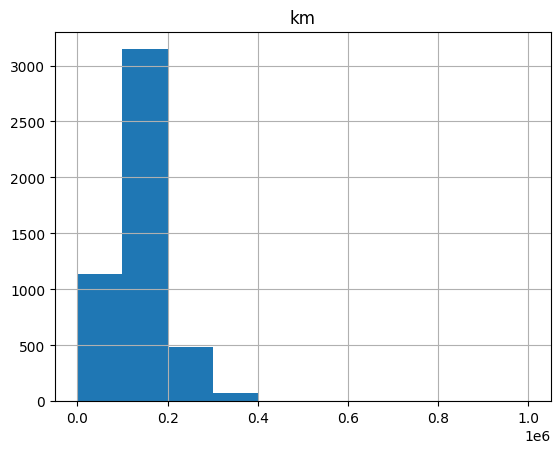

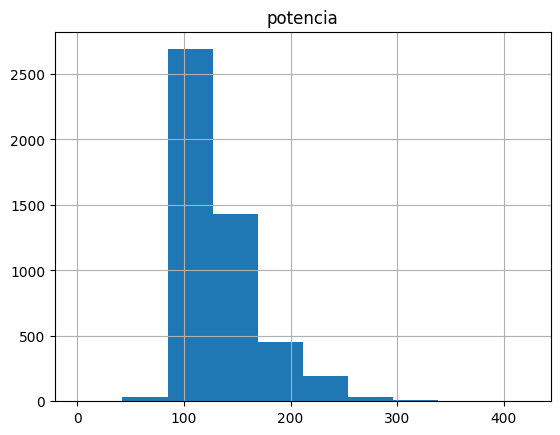

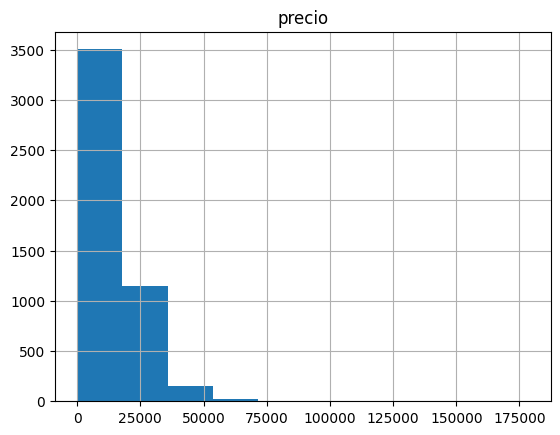

In [531]:
 for i in df_bmw1:
  if (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))
  elif df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')

# OUTLAYERS **NUMERICOS**

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'precio'}>]]


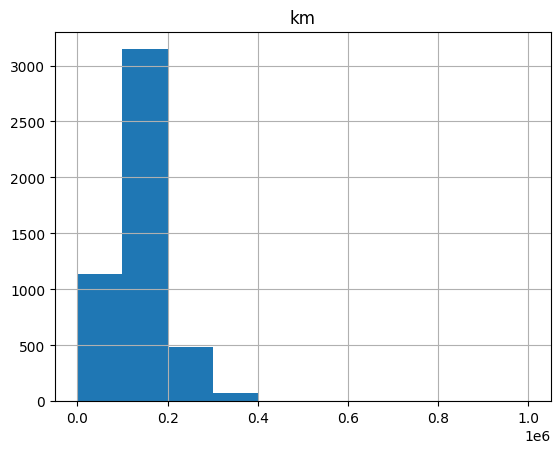

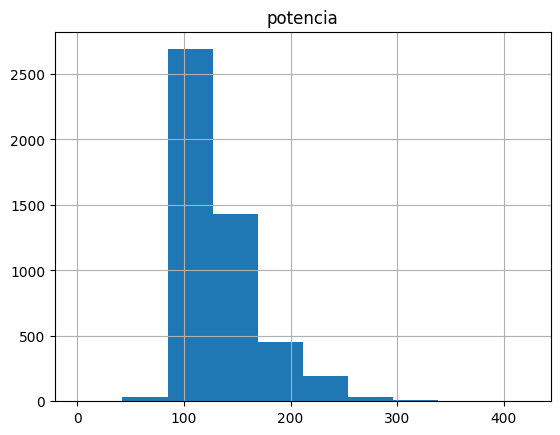

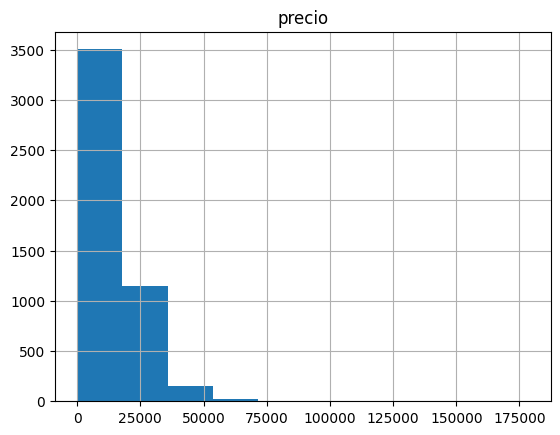

In [532]:
#HACEMOS HISTOGRAMAS PARA DETECTAR POSIBLES OUTLAYERS
for i in df_bmw1:
  if (df_bmw1[i].dtype.kind=="f") or (df_bmw1[i].dtype.kind=="i"):
    print(df_bmw1.hist(i))

OUTLAYERS **NUMERICOS**

In [533]:
#miramos cuantos coches hay más altos de 70000 de precio
df_bmw1[df_bmw1['precio'] > 70000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,NaT,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
2938,640 Gran Coupé,-64.0,230.0,NaT,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,NaN,False,NaN,False,False,False,True,73100.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [534]:
#Por debajo si los precios son más bajos de 500 los borramos
df_bmw1[df_bmw1['precio'] < 500]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,320,179358.0,120.0,2013-06-01,diesel,black,NaN,False,True,False,NaN,False,False,True,True,100.0,2018-03-01
630,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01
879,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,NaN,False,False,False,True,100.0,2018-04-01
1255,320,170381.0,135.0,NaT,diesel,silver,NaN,True,True,False,NaN,False,False,True,False,100.0,2018-05-01
1513,520,358332.0,100.0,NaT,diesel,blue,NaN,False,False,False,NaN,True,False,True,False,400.0,2018-07-01
1558,520,358333.0,100.0,NaT,diesel,blue,estate,False,False,False,NaN,True,NaN,True,NaN,400.0,2018-07-01
1832,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,NaN,False,False,True,NaN,100.0,2018-03-01
2473,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01
2574,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01
2611,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [535]:
#los borramos
df_bmw1=df_bmw1[(df_bmw1['precio'] <= 70000) & (df_bmw1['precio'] >= 500) ]

#quitar precios bajos

<Axes: >

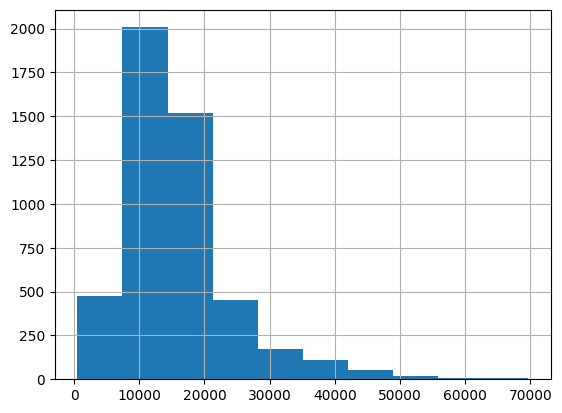

In [536]:
#verificamos histograma
df_bmw1['precio'].hist()

In [537]:
#miramos cuantos coches hay más altos de 300 CV
df_bmw1[df_bmw1['potencia'] > 300]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
67,M3,29925.0,309.0,NaT,petrol,silver,NaN,True,True,False,NaN,True,True,True,True,47000.0,2018-04-01
72,M4,69410.0,317.0,2015-02-01,petrol,white,NaN,True,True,False,NaN,False,True,True,True,53600.0,2018-03-01
73,M3,170550.0,309.0,NaT,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,28000.0,2018-03-01
93,M3,99283.0,309.0,NaT,petrol,silver,NaN,False,False,False,NaN,True,False,True,True,28600.0,2018-04-01
139,M3,169970.0,309.0,2011-03-01,petrol,grey,coupe,True,True,False,NaN,True,False,True,True,35700.0,2018-08-01
2944,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,NaN,False,True,True,True,51200.0,2018-04-01
3092,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,NaN,False,True,True,True,52400.0,2018-05-01
3601,M5,150187.0,412.0,NaT,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01


In [538]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['potencia'] < 300]

<Axes: >

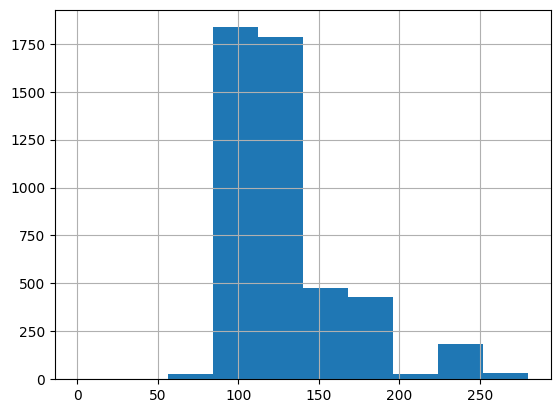

In [539]:
#verificamos histograma
df_bmw1['potencia'].hist()

In [540]:
#miramos cuantos coches hay más altos de 400000 km
df_bmw1[df_bmw1['km'] > 400000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,NaN,False,NaN,True,False,8300.0,2018-03-01
1573,320,400654.0,110.0,2006-12-01,diesel,black,estate,False,False,True,NaN,False,False,True,False,1800.0,2018-07-01
2350,318,477571.0,85.0,NaT,diesel,grey,NaN,False,True,False,NaN,False,True,False,False,1200.0,2018-07-01
3198,320,405816.0,100.0,2000-02-01,diesel,blue,sedan,False,False,False,NaN,False,NaN,True,False,500.0,2018-05-01
3732,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,1400.0,2018-06-01


In [541]:
#los borramos
df_bmw1=df_bmw1[df_bmw1['km'] < 400000]

<Axes: >

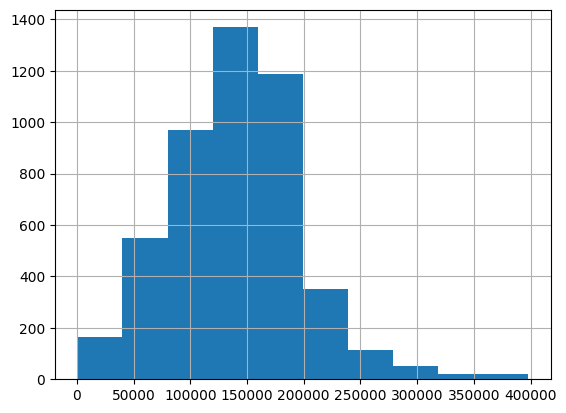

In [542]:
#verificamos histograma
df_bmw1['km'].hist()

# COHERENCIA DE LOS DATOS CATEGORICOS EXAMEN **MULTIVARIABLE**

In [543]:
#preparamos un dataframe para modelos por tipos de coches
df_tipo_modelo = pd.DataFrame({'modelo': df_bmw1['modelo'], 'tipo_coche': df_bmw1['tipo_coche']})
df_tipo_modelo_sin_nulos=df_tipo_modelo.dropna()


In [544]:
#función para calcular la moda
def calcular_moda(x):
    counts = x.value_counts()  # Contar la frecuencia de cada valor
    moda = counts[counts == counts.max()]  # Obtener los valores con la máxima frecuencia (la moda)
    return moda

In [545]:
moda_por_grupo = df_tipo_modelo_sin_nulos.groupby('modelo')['tipo_coche'].apply(calcular_moda)

In [546]:
moda_por_grupo = pd.DataFrame(moda_por_grupo)
moda_por_grupo = moda_por_grupo.reset_index()
moda_por_grupo

,modelo,level_1,tipo_coche
0,Active Tourer,van,1
1,114,hatchback,6
2,116,hatchback,190
3,118,hatchback,79
4,120,hatchback,16
...,...,...,...
70,X5 M50,suv,3
71,X6,suv,30
72,X6 M,suv,6
73,Z4,convertible,5


In [547]:
del moda_por_grupo['tipo_coche']
moda_por_grupo.rename(columns={'level_1': 'tipo_coche'},inplace=True)
moda_por_grupo

,modelo,tipo_coche
0,Active Tourer,van
1,114,hatchback
2,116,hatchback
3,118,hatchback
4,120,hatchback
...,...,...
70,X5 M50,suv
71,X6,suv
72,X6 M,suv
73,Z4,convertible


In [548]:
#función para cambiar el tipo de coche en función del modelo
def tipo_coche_modelo(row):
  for i in range(len(moda_por_grupo)):
    if row['modelo'] == moda_por_grupo.iloc[i,0]:
      return moda_por_grupo.iloc[i,1]
  return None

In [549]:
df_bmw1['tipo'] = df_bmw1.apply(tipo_coche_modelo, axis=1)

In [550]:
del df_bmw1['tipo_coche']
df_bmw1.rename(columns={'tipo': 'tipo_coche'}, inplace=True)
df_bmw1

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche
0,118,140411.0,100.0,2012-02-01,diesel,black,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,hatchback
2,320,183297.0,120.0,2012-04-01,diesel,white,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,estate
3,420,128035.0,135.0,NaT,diesel,red,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,coupe
4,425,97097.0,160.0,NaT,diesel,silver,True,True,False,False,False,True,True,True,33400.0,2018-04-01,coupe
5,335,152352.0,225.0,2011-05-01,petrol,black,True,True,False,False,True,True,True,True,17100.0,2018-02-01,coupe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01,van
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01,van
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01,van
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,True,True,False,False,False,False,True,True,22700.0,2018-09-01,van


**OUTLAYERS** CATEGORICOS

In [551]:
 for i in df_bmw1:
  if df_bmw1[i].dtype.kind == "O":
    print(i,'\n', df_bmw1[i].value_counts(), '\n')

modelo 
 320                746
520                628
318                563
X3                 435
116                357
                  ... 
M135                 1
M3                   1
225                  1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 73, dtype: int64 

tipo_gasolina 
 diesel           4602
petrol            178
hybrid_petrol       6
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1488
grey      1061
blue       635
white      481
brown      302
silver     287
red         46
beige       37
green       14
orange       6
Name: color, dtype: int64 

volante_regulable 
 True     2638
False    2156
Name: volante_regulable, dtype: int64 

aire_acondicionado 
 True     3440
False     878
Name: aire_acondicionado, dtype: int64 

camara_trasera 
 False    3829
True      967
Name: camara_trasera, dtype: int64 

asientos_traseros_plegables 
 False    1137
True      300
Name: asientos_traseros_plegabl

In [552]:
#la función hace lo siguiente, crea una lista vacía, hace un conteo de los valores del dataset, se hace un reset index para que se vuelva un dataset
#luego se recorre el data set y se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral, en caso sea así se agrega en una lista
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []
  tabla=dataset[columna].value_counts().reset_index()
  for i in range(len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [553]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [554]:
df_bmw2 = df_bmw1.copy()


In [555]:
#Eliminamos resgistros donde haya menos de 30 modelos
lista_eliminar_modelo = obten_lista_eliminar(df_bmw2, "modelo", 30)
lista_eliminar_modelo

['520 Gran Turismo',
 '325',
 '530 Gran Turismo',
 '740',
 '640 Gran Coupé',
 'X5 M',
 '114',
 '218 Active Tourer',
 'M550',
 '218',
 '218 Gran Tourer',
 '418 Gran Coupé',
 '640',
 'X6 M',
 '335',
 '435 Gran Coupé',
 '528',
 'Z4',
 'i3',
 '328',
 '125',
 '430 Gran Coupé',
 '216 Gran Tourer',
 '435',
 '135',
 '325 Gran Turismo',
 '523',
 '220',
 '330 Gran Turismo',
 'M235',
 '335 Gran Turismo',
 '216 Active Tourer',
 'X5 M50',
 '650',
 '535 Gran Turismo',
 '750',
 '123',
 '430',
 '425',
 '216',
 '220 Active Tourer',
 ' Active Tourer',
 '225 Active Tourer',
 '635',
 '735',
 'ActiveHybrid 5',
 'M135',
 'M3',
 '225',
 '630',
 '214 Gran Tourer']

In [556]:
eliminar_lista_df(df_bmw2,"modelo",lista_eliminar_modelo)

In [557]:
df_bmw1.shape

(4798, 17)

In [558]:
df_bmw2.shape

(4495, 17)

In [559]:
lista_eliminar_tipo_gasolina = obten_lista_eliminar(df_bmw2, "tipo_gasolina", 20)
lista_eliminar_tipo_gasolina

['Diesel', 'hybrid_petrol']

In [560]:
df_bmw2['tipo_gasolina'].value_counts()

diesel           4363
petrol            121
Diesel              5
hybrid_petrol       2
Name: tipo_gasolina, dtype: int64

In [561]:
#hacemos filtro coches diesel para poner los Diesel igual
filtro_diesel=df_bmw2["tipo_gasolina"]=="Diesel"
df_bmw2_diesel = df_bmw2.loc[filtro_diesel]
df_bmw2_diesel

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche
658,320,164900.0,120.0,NaT,Diesel,grey,False,True,True,NaN,True,True,True,False,11800.0,2018-03-01,estate
664,320,163777.0,120.0,2014-10-01,Diesel,black,False,True,False,NaN,False,NaN,True,True,12700.0,2018-03-01,estate
695,320,178944.0,122.0,2013-12-01,Diesel,blue,True,True,False,NaN,True,False,True,True,6500.0,2018-03-01,estate
740,530,148328.0,190.0,NaT,Diesel,grey,True,True,False,NaN,True,True,True,True,23100.0,2018-07-01,estate
789,318,105026.0,105.0,2014-10-01,Diesel,grey,False,True,False,NaN,True,True,True,False,15700.0,2018-03-01,estate


In [562]:
df_bmw2.loc[filtro_diesel, 'tipo_gasolina'] = 'diesel'
df_bmw2['tipo_gasolina'].value_counts()

diesel           4368
petrol            121
hybrid_petrol       2
Name: tipo_gasolina, dtype: int64

In [563]:
eliminar_lista_df(df_bmw2,"tipo_gasolina",lista_eliminar_tipo_gasolina)

In [564]:
df_bmw2.shape

(4493, 17)

In [565]:
lista_colores_minoritarios = obten_lista_eliminar(df_bmw2, "color", 50)
lista_colores_minoritarios

['red', 'beige', 'green', 'orange']

In [566]:
#reseteamos los índides para ac
df_bmw2.reset_index(drop=True, inplace=True)

In [567]:
#sustituimos el valor de los colores minoritarios como otros
def sustituir_valores(dataset,lista,columna,valor):
  lista_sustituidos=[]
  for i in range(len(dataset)):
    if df_bmw2.loc[i,columna] in lista:
        df_bmw2.loc[i,columna]=valor
        lista_sustituidos
  return lista_sustituidos

In [568]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_colores_minoritarios,"color","otros")

In [569]:
df_bmw2["color"].value_counts()

black     1396
grey       992
blue       590
white      449
brown      290
silver     269
otros       92
Name: color, dtype: int64

In [570]:
#lo mismo hacemos con tipo de coche
lista_tipos_minoritarios = obten_lista_eliminar(df_bmw2, "tipo_coche", 40)
lista_tipos_minoritarios

[]

In [571]:
valores_sustituidos=sustituir_valores(df_bmw2,lista_tipos_minoritarios,"tipo_coche","otros")

In [572]:
print(df_bmw2["tipo_coche"].value_counts())

estate       2306
suv          1026
hatchback     738
sedan         377
coupe          43
Name: tipo_coche, dtype: int64


# **NULOS**

In [573]:
#miramos nulos
df_bmw2.isnull().sum()

modelo                            3
km                                0
potencia                          0
fecha_registro                 2244
tipo_gasolina                     4
color                           415
volante_regulable                 4
aire_acondicionado              440
camara_trasera                    2
asientos_traseros_plegables    3157
elevalunas_electrico              1
bluetooth                       672
gps                               0
alerta_lim_velocidad            678
precio                            0
fecha_venta                       1
tipo_coche                        3
dtype: int64

In [574]:
#Borramos la fecha de registro ya que consideramos que no va a ser importante para el cálculo del precio
del df_bmw2['fecha_registro']

In [575]:
df_bmw2.shape

(4493, 16)

In [576]:
# al tener 4666 registros consideramos que se pueden borrar los registros que tengan menos de un 5% (25 registros) a nulo
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() < 25 and df_bmw2[columna].isnull().sum() != 0:
    columnas_nulas.append(columna)
    df_bmw2.dropna(subset=[columna], inplace=True)

In [577]:
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           414
volante_regulable                 0
aire_acondicionado              438
camara_trasera                    0
asientos_traseros_plegables    3145
elevalunas_electrico              0
bluetooth                       669
gps                               0
alerta_lim_velocidad            675
precio                            0
fecha_venta                       0
tipo_coche                        0
dtype: int64

In [578]:
#Vemos que valores tienen las categógicas nulas
columnas=df_bmw2.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw2[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw2[columna].unique())
columnas_nulas

['black' 'white' 'otros' 'blue' nan 'grey' 'silver' 'brown']
[True False nan]
[nan False True]
[nan False True]
[nan False True]


['color',
 'aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

In [579]:
#copiamos dataframe:
df_bmw3 = df_bmw2.copy()

In [580]:
df_bmw3_color=df_bmw3.copy()

In [581]:
df_bmw3_color['color'].fillna('Desconocido', inplace=True)

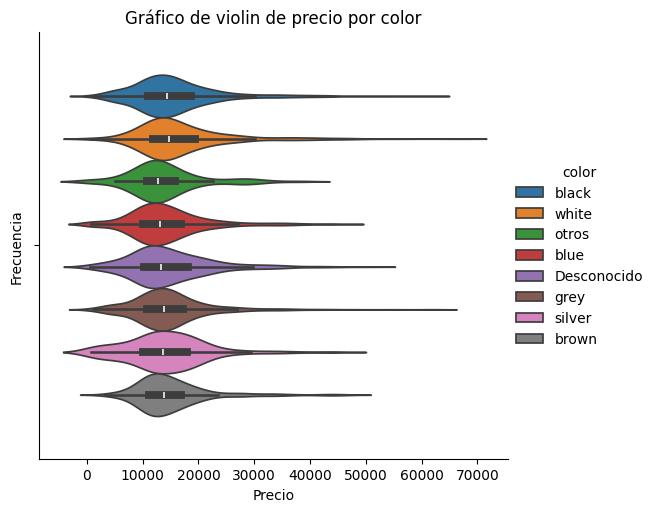

In [582]:
#Mramos si el precio depende del color, y vemos que en el grueso de vehículos no pasa
#decicimos poner una nueva categoria
sns.catplot(x = "precio", data= df_bmw3_color, kind="violin", hue="color")
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Gráfico de violin de precio por color')
plt.show()

In [583]:
 #Es muy parecido el violin al color black, lo ponemos en ese color
df_bmw3.fillna({'color':'black'}, inplace=True)

In [584]:
del df_bmw3_color

In [585]:
#Volvemos a hace la lista de categóricas nulas
columnas=df_bmw3.columns.tolist()
columnas_nulas=[]
for columna in columnas:
  if df_bmw3[columna].isnull().sum() > 0:
    columnas_nulas.append(columna)
    print(df_bmw3[columna].unique())
columnas_nulas

[True False nan]
[nan False True]
[nan False True]
[nan False True]


['aire_acondicionado',
 'asientos_traseros_plegables',
 'bluetooth',
 'alerta_lim_velocidad']

In [586]:
#Borramos combinatoria de 4 campos con valores nulos
indices_eliminar=df_bmw3[ df_bmw3['aire_acondicionado'].isnull() & df_bmw3['asientos_traseros_plegables'].isnull() & df_bmw3['alerta_lim_velocidad'].isnull() & df_bmw3['bluetooth'].isnull()].index
df_bmw3.drop(indices_eliminar,inplace=True)

In [587]:
len(df_bmw3)

4476

In [588]:
#Borramos combinatoria de columnas de 3 valores nulos
combinaciones = list(combinations(columnas_nulas, 3))
for combinacion in combinaciones:
    indices_eliminar=df_bmw3[df_bmw3[combinacion[0]].isnull() &  df_bmw3[combinacion[1]].isnull() &  df_bmw3[combinacion[2]].isnull()].index
    df_bmw3.drop(indices_eliminar,inplace=True)

In [589]:
len(df_bmw3)

4333

In [590]:
#volvemos a hacer recuento
df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 0
aire_acondicionado              351
camara_trasera                    0
asientos_traseros_plegables    3003
elevalunas_electrico              0
bluetooth                       565
gps                               0
alerta_lim_velocidad            571
precio                            0
fecha_venta                       0
tipo_coche                        0
dtype: int64

In [591]:
#Miramos el aire acondicionado, intuimos que puede depender del modelo de coche que tenga aire acondicionado , vamos a pasar de valores booleanos a numéricos #dataset sin nulos
df_bmw3_ac_nonulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].notnull()]
df_bmw3_ac_nulos=df_bmw3.loc[df_bmw3["aire_acondicionado"].isnull()]
df_bmw3_ac_nonulos["ac_int"]=0
df_bmw3_ac_nonulos = df_bmw3_ac_nonulos.reset_index()
for i in range(len(df_bmw3_ac_nonulos)):
  df_bmw3_ac_nonulos.loc[i,"ac_int"]=int(df_bmw3_ac_nonulos.loc[i,"aire_acondicionado"])
df_bmw3_ac_nulos = df_bmw3_ac_nulos.reset_index()
df_bmw3_ac_nulos["ac_int"]=2
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)

<ipython-input-591-e4a6a098ce60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw3_ac_nonulos["ac_int"]=0


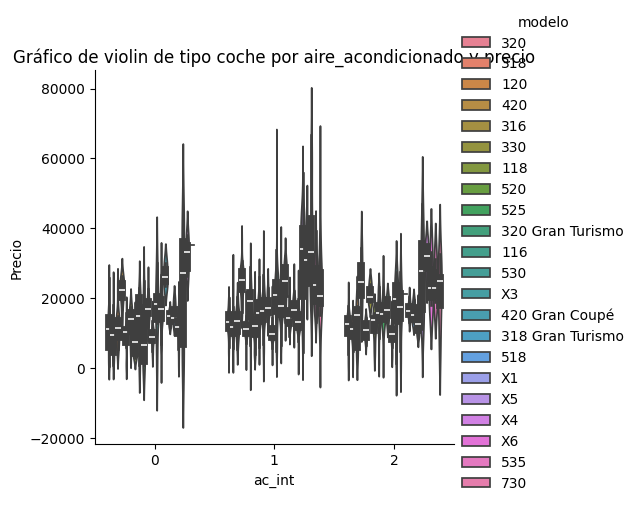

In [592]:
#Verificamos si pasa lo mismo con el tipo de coche
sns.catplot(x = "ac_int", y="precio", data= df_bmw4, kind="violin", hue="modelo")
plt.xlabel('ac_int')
plt.ylabel('Precio')
plt.title('Gráfico de violin de tipo coche por aire_acondicionado y precio')
plt.show()


In [593]:
#CONCLUSION, no se ve nada #Vamos a calcular la moda de cada uno de los tipos de coche y asignaremos a esos tipos el valor dependiendo de ella, vemos que solo un tipo de modelo suele no llevar AC
moda_ac_por_tipo = df_bmw3_ac_nonulos.groupby('modelo')['aire_acondicionado'].apply(lambda x: x.mode())
moda_ac_por_tipo

modelo             
116               0    True
118               0    True
120               0    True
316               0    True
318               0    True
318 Gran Turismo  0    True
320               0    True
320 Gran Turismo  0    True
330               0    True
420               0    True
420 Gran Coupé    0    True
518               0    True
520               0    True
525               0    True
530               0    True
535               0    True
730               0    True
X1                0    True
X3                0    True
X4                0    True
X5                0    True
X6                0    True
Name: aire_acondicionado, dtype: object

In [594]:
#descubrimos que la moda en todos los tipos de coche es que lleven aire acondicionado ponemos todos los valores nulos a 1
def ac_change(row):
  if row["modelo"] == '114':
    return 0
  else:
    return 1

df_bmw3_ac_nulos['ac_int'] = df_bmw3_ac_nulos.apply(ac_change, axis=1)
df_bmw4 = pd.concat([df_bmw3_ac_nonulos,df_bmw3_ac_nulos],axis=0)

In [595]:
#borramos campo aire_acondicionado y los df auxiliares
del df_bmw4['aire_acondicionado']
del df_bmw3
del df_bmw3_ac_nulos
del df_bmw3_ac_nonulos
del moda_ac_por_tipo

In [596]:
#volvemos a hacer recuento
df_bmw4.isnull().sum()

index                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 0
camara_trasera                    0
asientos_traseros_plegables    3003
elevalunas_electrico              0
bluetooth                       565
gps                               0
alerta_lim_velocidad            571
precio                            0
fecha_venta                       0
tipo_coche                        0
ac_int                            0
dtype: int64

In [597]:
#Vamos a hacer lo mismo con los asientos_traseros_plegables
df_bmw4_atp_nonulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].notnull()]
df_bmw4_atp_nulos=df_bmw4.loc[df_bmw4["asientos_traseros_plegables"].isnull()]
df_bmw4_atp_nonulos["atp_int"]=0
df_bmw4_atp_nonulos = df_bmw4_atp_nonulos.reset_index()
for i in range(len(df_bmw4_atp_nonulos)):
  df_bmw4_atp_nonulos.loc[i,"atp_int"]=int(df_bmw4_atp_nonulos.loc[i,"asientos_traseros_plegables"])
df_bmw4_atp_nulos = df_bmw4_atp_nulos.reset_index()
df_bmw4_atp_nulos["atp_int"]=2
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)
df_bmw5

<ipython-input-597-0707f522e2e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw4_atp_nonulos["atp_int"]=0


,level_0,index,modelo,km,potencia,tipo_gasolina,color,volante_regulable,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche,ac_int,atp_int
0,6,8,120,174631.0,120.0,diesel,black,True,False,False,False,False,True,False,10500.0,2018-04-01,hatchback,1,0
1,9,11,318,196092.0,85.0,petrol,black,True,False,False,False,False,False,False,1800.0,2018-05-01,estate,0,0
2,13,15,420,64832.0,135.0,diesel,grey,True,False,False,True,NaN,True,True,27500.0,2018-06-01,coupe,1,0
3,15,17,318,187294.0,105.0,petrol,black,True,False,False,False,True,True,NaN,2400.0,2018-06-01,estate,0,0
4,16,18,320,194192.0,120.0,diesel,otros,True,False,False,True,False,True,False,11800.0,2018-07-01,estate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,345,4451,X6,164866.0,210.0,diesel,grey,True,True,NaN,True,True,True,True,22800.0,2018-09-01,suv,1,2
2999,346,4452,X3,13412.0,100.0,diesel,black,True,False,NaN,False,False,True,False,19500.0,2018-09-01,suv,1,2
3000,347,4461,X3,126165.0,135.0,diesel,grey,True,False,NaN,True,True,True,True,19800.0,2018-09-01,suv,1,2
3001,349,4491,X3,110039.0,130.0,diesel,black,False,False,NaN,False,False,True,False,1300.0,2018-05-01,suv,1,2


In [598]:
#Vamos a calcular la moda de cada uno de los tipos de coche (en el caso de los aseints plegables pensamos que depende más del tipo que del modelo) y asignaremos a esos tipos el valor dependiendo de ella.
moda_atp_por_tipo = df_bmw4_atp_nonulos.groupby('tipo_coche')['asientos_traseros_plegables'].apply(lambda x: x.mode())
moda_atp_por_tipo

tipo_coche   
coupe       0    False
estate      0    False
hatchback   0    False
sedan       0    False
suv         0     True
Name: asientos_traseros_plegables, dtype: object

In [599]:
#En los suv la moda es True, corremos proceso para informar a True los suv y el resto a false
def atp_change(row):
  if row["tipo_coche"] == 'suv':
    return 1
  else:
    return 0
df_bmw4_atp_nulos['atp_int'] = df_bmw4_atp_nulos.apply(atp_change, axis=1)

In [600]:
df_bmw5 = pd.concat([df_bmw4_atp_nonulos,df_bmw4_atp_nulos],axis=0)

In [601]:
#borramos campo asientos_traseros_plegables y df axiliares
del df_bmw5['asientos_traseros_plegables']
del df_bmw4_atp_nonulos
del df_bmw4_atp_nulos
del df_bmw4

In [602]:
df_bmw5

,level_0,index,modelo,km,potencia,tipo_gasolina,color,volante_regulable,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche,ac_int,atp_int
0,6,8,120,174631.0,120.0,diesel,black,True,False,False,False,True,False,10500.0,2018-04-01,hatchback,1,0
1,9,11,318,196092.0,85.0,petrol,black,True,False,False,False,False,False,1800.0,2018-05-01,estate,0,0
2,13,15,420,64832.0,135.0,diesel,grey,True,False,True,NaN,True,True,27500.0,2018-06-01,coupe,1,0
3,15,17,318,187294.0,105.0,petrol,black,True,False,False,True,True,NaN,2400.0,2018-06-01,estate,0,0
4,16,18,320,194192.0,120.0,diesel,otros,True,False,True,False,True,False,11800.0,2018-07-01,estate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,345,4451,X6,164866.0,210.0,diesel,grey,True,True,True,True,True,True,22800.0,2018-09-01,suv,1,1
2999,346,4452,X3,13412.0,100.0,diesel,black,True,False,False,False,True,False,19500.0,2018-09-01,suv,1,1
3000,347,4461,X3,126165.0,135.0,diesel,grey,True,False,True,True,True,True,19800.0,2018-09-01,suv,1,1
3001,349,4491,X3,110039.0,130.0,diesel,black,False,False,False,False,True,False,1300.0,2018-05-01,suv,1,1


In [603]:
#borramos la columna level_0 usado para reindexar
del df_bmw5['level_0']

In [604]:
#Mismo proceso bluetooth
df_bmw5_bt_nonulos=df_bmw5.loc[df_bmw5["bluetooth"].notnull()]
df_bmw5_bt_nulos=df_bmw5.loc[df_bmw5["bluetooth"].isnull()]
df_bmw5_bt_nonulos["bt_int"]=0
df_bmw5_bt_nonulos
df_bmw5_bt_nonulos = df_bmw5_bt_nonulos.reset_index()
for i in range(len(df_bmw5_bt_nonulos)):
  df_bmw5_bt_nonulos.loc[i,"bt_int"]=int(df_bmw5_bt_nonulos.loc[i,"bluetooth"])
df_bmw5_bt_nulos = df_bmw5_bt_nulos.reset_index()

<ipython-input-604-c9cf951b30ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw5_bt_nonulos["bt_int"]=0


In [605]:
#El bluetooth lo vamos a hacer por modelo
moda_bt_por_tipo = df_bmw5_bt_nonulos.groupby('modelo')['bluetooth'].apply(lambda x: x.mode())
moda_bt_por_tipo

modelo             
116               0    False
118               0    False
120               0    False
316               0    False
318               0    False
318 Gran Turismo  0    False
320               0    False
320 Gran Turismo  0    False
330               0    False
420               0     True
420 Gran Coupé    0    False
518               0    False
520               0    False
525               0    False
530               0    False
535               0     True
730               0    False
X1                0    False
X3                0    False
X4                0    False
X5                0    False
X6                0    False
Name: bluetooth, dtype: object

In [606]:
#agrupamos para saber la moda de cada uno de los modelos
moda_bt_por_tipo = df_bmw5_bt_nonulos.groupby('modelo')['bluetooth'].apply(lambda x: x.mode())
#sacamos una lista con los modelos cuya moda es que llevan bluetooth
df_moda_bt_por_tipo = pd.DataFrame(moda_bt_por_tipo)
df_moda_bt_por_tipo = moda_bt_por_tipo[df_moda_bt_por_tipo["bluetooth"]==True]
df_moda_bt_por_tipo = df_moda_bt_por_tipo.reset_index()
lista_modelos_bt = df_moda_bt_por_tipo["modelo"].tolist()
def bt_change(row):
  if row["modelo"] in lista_modelos_bt:
    return 1
  else:
    return 0

df_bmw5_bt_nulos['bt_int'] = df_bmw5_bt_nulos.apply(bt_change, axis=1)

In [607]:
df_bmw6 = pd.concat([df_bmw5_bt_nonulos,df_bmw5_bt_nulos],axis=0)

In [608]:
#borramos campo bluetooth y df axiliares
del df_bmw6['bluetooth']
del df_bmw6['level_0']
del df_bmw5_bt_nonulos
del df_bmw5_bt_nulos
del df_moda_bt_por_tipo
del moda_bt_por_tipo
del df_bmw5

In [609]:
df_bmw6

,index,modelo,km,potencia,tipo_gasolina,color,volante_regulable,camara_trasera,elevalunas_electrico,gps,alerta_lim_velocidad,precio,fecha_venta,tipo_coche,ac_int,atp_int,bt_int
0,8,120,174631.0,120.0,diesel,black,True,False,False,True,False,10500.0,2018-04-01,hatchback,1,0,0
1,11,318,196092.0,85.0,petrol,black,True,False,False,False,False,1800.0,2018-05-01,estate,0,0,0
2,17,318,187294.0,105.0,petrol,black,True,False,False,True,NaN,2400.0,2018-06-01,estate,0,0,1
3,18,320,194192.0,120.0,diesel,otros,True,False,True,True,False,11800.0,2018-07-01,estate,1,0,0
4,21,120,223269.0,120.0,diesel,blue,True,False,False,True,True,8000.0,2018-08-01,hatchback,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,4459,X3,153569.0,135.0,diesel,black,True,False,True,True,True,19500.0,2018-09-01,suv,1,1,0
561,4462,X3,174799.0,100.0,diesel,brown,True,False,False,True,False,18400.0,2018-09-01,suv,1,1,0
562,4468,X5,151522.0,190.0,diesel,black,True,False,True,True,True,33000.0,2018-09-01,suv,1,1,0
563,4478,X3,97835.0,190.0,diesel,brown,True,True,False,False,True,5400.0,2018-09-01,suv,1,1,0


In [610]:
#Alerta límite e velocidad por modelo
df_bmw6_alv_nonulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].notnull()]
df_bmw6_alv_nulos=df_bmw6.loc[df_bmw6["alerta_lim_velocidad"].isnull()]
df_bmw6_alv_nonulos["alv_int"]=0
df_bmw6_alv_nonulos = df_bmw6_alv_nonulos.reset_index()
for i in range(len(df_bmw6_alv_nonulos)):
  df_bmw6_alv_nonulos.loc[i,"alv_int"]=int(df_bmw6_alv_nonulos.loc[i,"alerta_lim_velocidad"])
df_bmw6_alv_nulos = df_bmw6_alv_nulos.reset_index()

<ipython-input-610-3fcad994534e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw6_alv_nonulos["alv_int"]=0


In [611]:
#moda por modelo de alerta limite velocidad
moda_alv_por_tipo = df_bmw6_alv_nonulos.groupby('modelo')['alerta_lim_velocidad'].apply(lambda x: x.mode())
#sacamos una lista con los modelos cuya moda es que llevan bluetooth
df_moda_alv_por_tipo = pd.DataFrame(moda_alv_por_tipo)
df_moda_alv_por_tipo = moda_alv_por_tipo[df_moda_alv_por_tipo["alerta_lim_velocidad"]==True]
df_moda_alv_por_tipo = df_moda_alv_por_tipo.reset_index()
lista_modelos_alv = df_moda_alv_por_tipo["modelo"].tolist()
lista_modelos_alv

['320',
 '320 Gran Turismo',
 '330',
 '420',
 '420 Gran Coupé',
 '518',
 '520',
 '525',
 '530',
 '535',
 '730',
 'X3',
 'X4',
 'X5',
 'X6']

In [612]:
def alv_change(row):
  if row["modelo"] in lista_modelos_alv:
    return 1
  else:
    return 0

df_bmw6_alv_nulos['alv_int'] = df_bmw6_alv_nulos.apply(alv_change, axis=1)

In [613]:
#volvemos a hacer recuento
#Efectivamente Ponemos todos los null a 0
df_bmw7 = pd.concat([df_bmw6_alv_nonulos,df_bmw6_alv_nulos],axis=0)

In [614]:
#borramos campo bluetooth y df axiliares
del df_bmw7['alerta_lim_velocidad']
del df_bmw7['level_0']
del df_bmw6_alv_nonulos
del df_bmw6_alv_nulos
del df_moda_alv_por_tipo
del moda_alv_por_tipo
del df_bmw6

In [615]:
df_bmw7.isnull().sum()

index                   0
modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
volante_regulable       0
camara_trasera          0
elevalunas_electrico    0
gps                     0
precio                  0
fecha_venta             0
tipo_coche              0
ac_int                  0
atp_int                 0
bt_int                  0
alv_int                 0
dtype: int64

In [616]:
df_bmw7 = df_bmw7.reset_index()
df_bmw7

,level_0,index,modelo,km,potencia,tipo_gasolina,color,volante_regulable,camara_trasera,elevalunas_electrico,gps,precio,fecha_venta,tipo_coche,ac_int,atp_int,bt_int,alv_int
0,0,8,120,174631.0,120.0,diesel,black,True,False,False,True,10500.0,2018-04-01,hatchback,1,0,0,0
1,1,11,318,196092.0,85.0,petrol,black,True,False,False,False,1800.0,2018-05-01,estate,0,0,0,0
2,2,18,320,194192.0,120.0,diesel,otros,True,False,True,True,11800.0,2018-07-01,estate,1,0,0,0
3,3,21,120,223269.0,120.0,diesel,blue,True,False,False,True,8000.0,2018-08-01,hatchback,1,0,0,1
4,4,23,318,187104.0,105.0,petrol,otros,True,False,False,True,2600.0,2018-08-01,estate,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,566,4076,X3,12541.0,120.0,diesel,black,True,True,False,True,18600.0,2018-06-01,suv,1,1,0,1
4329,567,4171,X3,233221.0,190.0,diesel,black,False,False,True,True,15600.0,2018-06-01,suv,1,1,0,1
4330,568,4261,X5,194722.0,225.0,diesel,black,False,False,False,True,20500.0,2018-07-01,suv,1,0,0,1
4331,569,4311,X6,295953.0,225.0,diesel,black,True,True,True,True,22000.0,2018-07-01,suv,1,1,0,1


In [617]:
#Tratamos resto de booleanos
df_bmw7["vr_int"]=0
df_bmw7["ct_int"]=0
df_bmw7["ee_int"]=0
df_bmw7["gps_int"]=0
for i in range(len(df_bmw7)):
  df_bmw7.loc[i,"vr_int"]=int(df_bmw7.loc[i,"volante_regulable"])
  df_bmw7.loc[i,"ct_int"]=int(df_bmw7.loc[i,"camara_trasera"])
  df_bmw7.loc[i,"ee_int"]=int(df_bmw7.loc[i,"elevalunas_electrico"])
  df_bmw7.loc[i,"gps_int"]=int(df_bmw7.loc[i,"gps"])
del df_bmw7['level_0']
del df_bmw7['volante_regulable']
del df_bmw7['camara_trasera']
del df_bmw7['elevalunas_electrico']
del df_bmw7['gps']

In [618]:
df_bmw7

,index,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta,tipo_coche,ac_int,atp_int,bt_int,alv_int,vr_int,ct_int,ee_int,gps_int
0,8,120,174631.0,120.0,diesel,black,10500.0,2018-04-01,hatchback,1,0,0,0,1,0,0,1
1,11,318,196092.0,85.0,petrol,black,1800.0,2018-05-01,estate,0,0,0,0,1,0,0,0
2,18,320,194192.0,120.0,diesel,otros,11800.0,2018-07-01,estate,1,0,0,0,1,0,1,1
3,21,120,223269.0,120.0,diesel,blue,8000.0,2018-08-01,hatchback,1,0,0,1,1,0,0,1
4,23,318,187104.0,105.0,petrol,otros,2600.0,2018-08-01,estate,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,4076,X3,12541.0,120.0,diesel,black,18600.0,2018-06-01,suv,1,1,0,1,1,1,0,1
4329,4171,X3,233221.0,190.0,diesel,black,15600.0,2018-06-01,suv,1,1,0,1,0,0,1,1
4330,4261,X5,194722.0,225.0,diesel,black,20500.0,2018-07-01,suv,1,0,0,1,0,0,0,1
4331,4311,X6,295953.0,225.0,diesel,black,22000.0,2018-07-01,suv,1,1,0,1,1,1,1,1


# **Tratamiento de fechas**

In [ ]:
df_bmw8 = df_bmw7.copy()
del df_bmw7

In [472]:
for col in ['fecha_venta']:
    df_bmw8[col + '_hora'] = df_bmw8[col].dt.hour
    df_bmw8[col + '_nombredia'] = df_bmw8[col].dt.day_name()
    ##O .dt.weekday_name
    df_bmw8[col + '_dia'] = df_bmw8[col].dt.day
    df_bmw8[col + '_mes'] = df_bmw8[col].dt.month

In [473]:
del df_bmw8["fecha_venta"]

In [490]:
df_bmw8.reset_index()


,level_0,index,modelo,km,potencia,tipo_gasolina,color,precio,tipo_coche,ac_int,...,alv_int,vr_int,ct_int,ee_int,gps_int,fecha_venta_hora,fecha_venta_nombredia,fecha_venta_dia,fecha_venta_mes,log_precio
0,0,8,120,174631.0,120.0,diesel,black,10500.0,hatchback,1,...,0,1,0,0,1,0,Sunday,1,4,4.021189
1,1,11,318,196092.0,85.0,petrol,black,1800.0,estate,0,...,0,1,0,0,0,0,Tuesday,1,5,3.255273
2,2,18,320,194192.0,120.0,diesel,otros,11800.0,estate,1,...,0,1,0,1,1,0,Sunday,1,7,4.071882
3,3,21,120,223269.0,120.0,diesel,blue,8000.0,hatchback,1,...,1,1,0,0,1,0,Wednesday,1,8,3.903090
4,4,23,318,187104.0,105.0,petrol,otros,2600.0,estate,0,...,0,1,0,0,1,0,Wednesday,1,8,3.414973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,4328,4076,X3,12541.0,120.0,diesel,black,18600.0,suv,1,...,1,1,1,0,1,0,Friday,1,6,4.269513
4329,4329,4171,X3,233221.0,190.0,diesel,black,15600.0,suv,1,...,1,0,0,1,1,0,Friday,1,6,4.193125
4330,4330,4261,X5,194722.0,225.0,diesel,black,20500.0,suv,1,...,1,0,0,0,1,0,Sunday,1,7,4.311754
4331,4331,4311,X6,295953.0,225.0,diesel,black,22000.0,suv,1,...,1,1,1,1,1,0,Sunday,1,7,4.342423


In [ ]:
del df_bmw8["index"]

In [494]:
df_bmw8

,modelo,km,potencia,tipo_gasolina,color,precio,tipo_coche,ac_int,atp_int,bt_int,alv_int,vr_int,ct_int,ee_int,gps_int,fecha_venta_hora,fecha_venta_nombredia,fecha_venta_dia,fecha_venta_mes,log_precio
0,120,174631.0,120.0,diesel,black,10500.0,hatchback,1,0,0,0,1,0,0,1,0,Sunday,1,4,4.021189
1,318,196092.0,85.0,petrol,black,1800.0,estate,0,0,0,0,1,0,0,0,0,Tuesday,1,5,3.255273
2,320,194192.0,120.0,diesel,otros,11800.0,estate,1,0,0,0,1,0,1,1,0,Sunday,1,7,4.071882
3,120,223269.0,120.0,diesel,blue,8000.0,hatchback,1,0,0,1,1,0,0,1,0,Wednesday,1,8,3.903090
4,318,187104.0,105.0,petrol,otros,2600.0,estate,0,0,1,0,1,0,0,1,0,Wednesday,1,8,3.414973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,X3,12541.0,120.0,diesel,black,18600.0,suv,1,1,0,1,1,1,0,1,0,Friday,1,6,4.269513
4329,X3,233221.0,190.0,diesel,black,15600.0,suv,1,1,0,1,0,0,1,1,0,Friday,1,6,4.193125
4330,X5,194722.0,225.0,diesel,black,20500.0,suv,1,0,0,1,0,0,0,1,0,Sunday,1,7,4.311754
4331,X6,295953.0,225.0,diesel,black,22000.0,suv,1,1,0,1,1,1,1,1,0,Sunday,1,7,4.342423


# **Tratamiento del target**

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

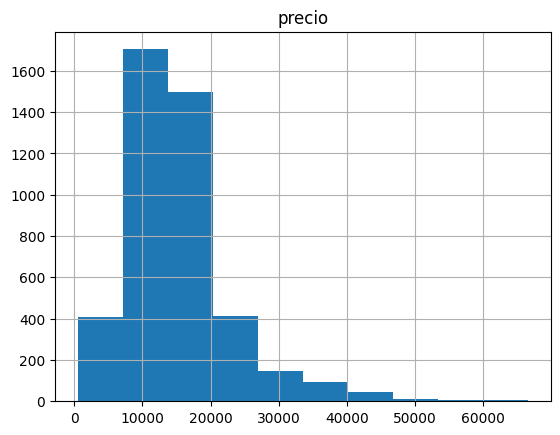

In [504]:
df_bmw8.hist("precio")

<Axes: xlabel='precio'>

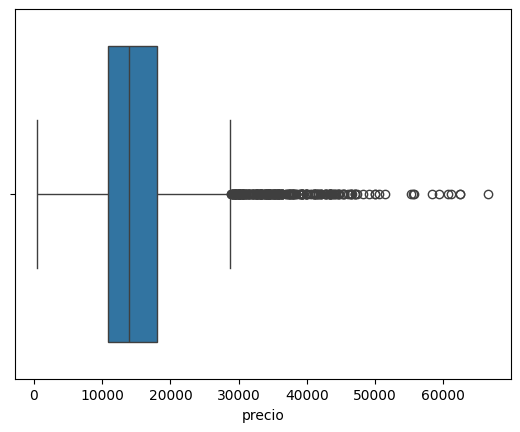

In [505]:
sns.boxplot(x=df_bmw8["precio"])

In [506]:
#Le aplicamos una escala logaritmica
df_bmw8["log_precio"]=np.log10(df_bmw8["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

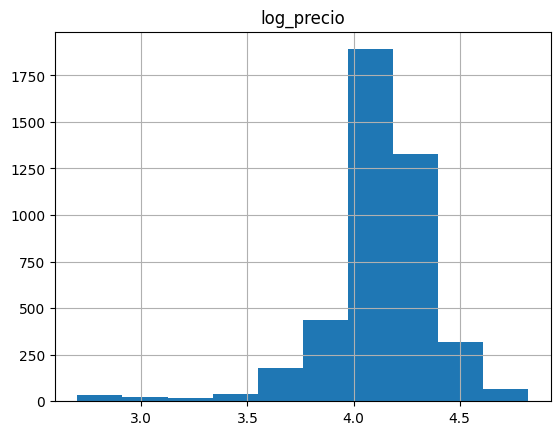

In [507]:
df_bmw8.hist("log_precio")

<Axes: xlabel='log_precio'>

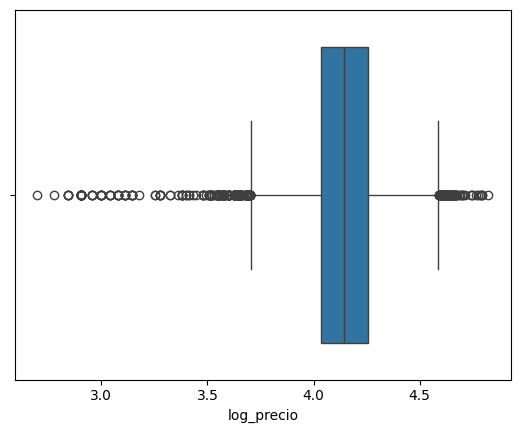

In [508]:
sns.boxplot(x=df_bmw8["log_precio"])

In [509]:
#le hemos dado la vueltra a la gráfica, dudas de que valga la pena este campo

# Pasamos las categóricas a **numéricas**

In [510]:
target= ["precio","log_precio"]

In [511]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [512]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw8)

In [513]:
lista_categoricas


['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta_nombredia']

In [500]:
df_bmw9=pd.get_dummies(data=df_bmw8, columns=lista_categoricas)

In [502]:
df_bmw9.head()

,km,potencia,precio,ac_int,atp_int,bt_int,alv_int,vr_int,ct_int,ee_int,...,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday
0,174631.0,120.0,10500.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,196092.0,85.0,1800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,194192.0,120.0,11800.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,223269.0,120.0,8000.0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,187104.0,105.0,2600.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [514]:
lista_numericas

['km', 'potencia', 'fecha_venta_hora', 'fecha_venta_dia', 'fecha_venta_mes']

In [515]:
minmaxresultado = MinMaxScaler()

In [516]:
df_bmw9[lista_numericas] = minmaxresultado.fit_transform(df_bmw9[lista_numericas])
#ponderamos variables numéricas

In [517]:
df_bmw9.head()

,km,potencia,precio,ac_int,atp_int,bt_int,alv_int,vr_int,ct_int,ee_int,...,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday
0,0.438052,0.428571,10500.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.492033,0.303571,1800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.487254,0.428571,11800.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.560391,0.428571,8000.0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.469425,0.375000,2600.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# **CORRELACIONES**

In [518]:
corr=df_bmw9.corr()

In [519]:
corr.style.background_gradient(cmap="coolwarm")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,precio,ac_int,atp_int,bt_int,alv_int,vr_int,ct_int,ee_int,gps_int,fecha_venta_hora,fecha_venta_dia,fecha_venta_mes,log_precio,modelo_116,modelo_118,modelo_120,modelo_316,modelo_318,modelo_318 Gran Turismo,modelo_320,modelo_320 Gran Turismo,modelo_330,modelo_420,modelo_420 Gran Coupé,modelo_518,modelo_520,modelo_525,modelo_530,modelo_535,modelo_730,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X6,tipo_gasolina_diesel,tipo_gasolina_petrol,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,fecha_venta_nombredia_Friday,fecha_venta_nombredia_Monday,fecha_venta_nombredia_Saturday,fecha_venta_nombredia_Sunday,fecha_venta_nombredia_Thursday,fecha_venta_nombredia_Tuesday,fecha_venta_nombredia_Wednesday
km,1.000000,-0.007588,-0.426029,0.033133,-0.105570,-0.022440,-0.014790,0.078831,0.001519,0.045590,0.170679,nan,nan,-0.002778,-0.432773,-0.130576,-0.036254,-0.013358,-0.007696,0.055807,0.002719,0.094295,-0.024106,-0.014516,-0.100841,-0.089813,0.026327,0.081422,0.096300,0.070672,0.025345,0.017054,-0.072802,-0.044074,-0.108544,-0.045924,-0.031213,-0.000537,0.000537,0.034461,-0.026409,-0.021890,0.031502,-0.006209,0.023687,-0.068386,-0.100841,0.224685,-0.143213,0.019359,-0.129619,-0.000095,0.018856,0.004858,0.006762,-0.011278,-0.010742,0.003422
potencia,-0.007588,1.000000,0.651312,0.188965,0.355338,0.176959,0.524866,0.313431,0.301361,0.363669,-0.002872,nan,nan,-0.019381,0.511195,-0.354361,-0.118572,0.017886,-0.282447,-0.273369,-0.105086,0.004909,0.029878,0.156991,0.018727,0.018164,-0.080946,0.022946,0.161173,0.345851,0.298539,0.134656,-0.117907,0.084758,0.086748,0.434407,0.249774,-0.000160,0.000160,0.047353,-0.018696,-0.056424,0.000270,-0.028715,0.003992,0.000092,0.018727,0.057664,-0.336846,-0.115067,0.300301,-0.027368,-0.012851,-0.031197,0.011457,0.009867,0.009071,0.018076
precio,-0.426029,0.651312,1.000000,0.244104,0.398436,0.193585,0.464473,0.272632,0.250286,0.315481,-0.000727,nan,nan,0.020007,0.866596,-0.209409,-0.126307,-0.033034,-0.143918,-0.203968,-0.005207,-0.170134,0.042983,0.016612,0.113809,0.102008,0.021964,0.031319,0.014779,0.119137,0.110120,0.094344,-0.082796,0.110889,0.211440,0.462005,0.249460,0.101814,-0.101814,0.032252,-0.042710,-0.000703,-0.025378,-0.022179,-0.033605,0.068514,0.113809,-0.186333,-0.184213,-0.038156,0.382789,-0.014611,-0.024355,-0.009557,-0.001939,-0.002122,0.007781,0.034565
ac_int,0.033133,0.188965,0.244104,1.000000,0.037737,0.110066,0.197167,0.289204,0.139280,0.261576,0.359924,nan,nan,0.008938,0.310856,-0.158503,-0.106577,-0.040598,-0.029138,0.010217,0.031660,-0.042145,0.003277,-0.012238,-0.018754,0.019795,0.043022,0.143273,0.052812,0.072807,0.047007,0.041485,-0.119124,-0.006276,0.019247,0.079940,0.041552,0.075987,-0.075987,0.007838,0.006486,0.053004,0.022610,-0.027094,-0.041059,-0.049840,-0.018754,0.120407,-0.157505,0.024525,-0.015563,0.007536,-0.010157,-0.000510,-0.030045,0.008486,0.009426,0.017802
atp_int,-0.105570,0.355338,0.398436,0.037737,1.000000,0.044031,0.197298,0.138582,0.132749,0.095531,-0.046497,nan,nan,0.105678,0.299414,-0.157512,-0.096099,-0.036624,-0.124645,-0.197202,-0.079928,-0.201623,-0.043985,-0.046767,-0.047146,-0.025544,-0.064320,-0.199684,-0.071981,-0.038928,0.010941,-0.033071,0.338819,0.531816,0.167564,0.393586,0.162642,0.046104,-0.046104,0.004007,-0.034524,-0.010715,-0.038187,0.029469,0.048090,0.042050,-0.047146,-0.469151,-0.221483,-0.134256,0.852325,0.024782,-0.037678,0.020128,0.010124,-0.038222,-0.050799,0.084257
bt_int,-0.022440,0.176959,0.193585,0.110066,0.044031,1.000000,0.089387,0.119740,0.123137,0.238842,0.118093,nan,nan,-0.014345,0.180296,-0.048094,0.027110,0.023063,-0.071647,-0.037142,0.029795,0.009136,0.053874,0.041287,0.113583,0.038566,-0.036886,-0.042941,0.019614,0.048983,0.104323,-0.036980,-0.077624,0.039075,0.011558,0.022044,0.020057,0.011657,-0.011657,0.016850,-0.008282,-0.052701,-0.021306,0.016430,-0.023160,0.065650,0.113583,-0.014563,0.0